In [25]:
import pandas as pd
import numpy as np
from numpy.random import  randint, randn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Scatter Plot

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


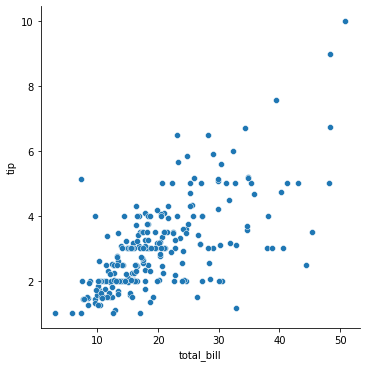

In [13]:
# relplot for numrical data plot
# the kind is scatter by default
sns.relplot(x='total_bill', y='tip', data=tips)

## Hue, Style and Size

- hue, size, and style parameters.
These parameters control what visual semantics are used to identify the different subsets. 

- It is good to be categorical variable


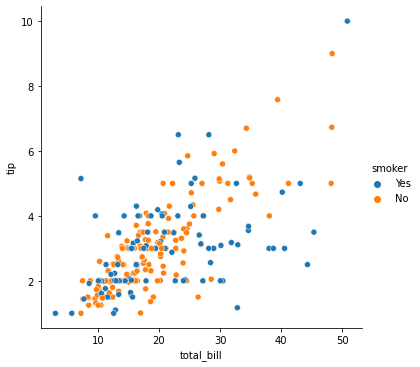

In [14]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='smoker')

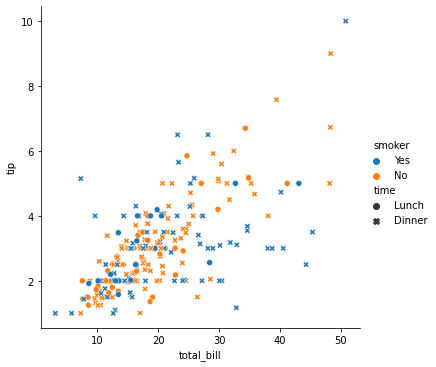

In [15]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='smoker', style='time')

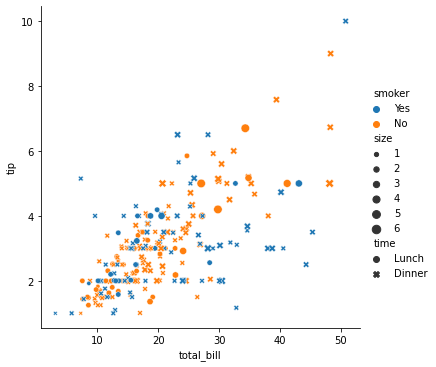

In [16]:
sns.relplot(x='total_bill', y='tip', data=tips, 
            hue='smoker', style='time', size='size')

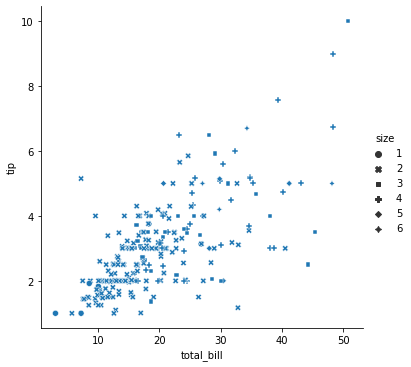

In [17]:
sns.relplot(x='total_bill', y='tip', data=tips, 
            style='size')

In [19]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

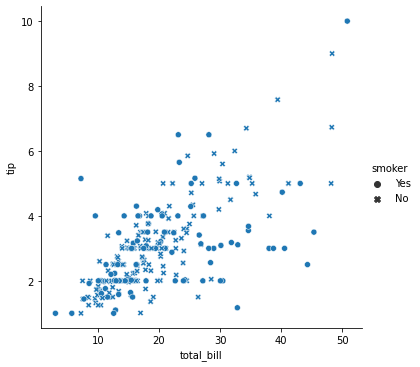

In [20]:
sns.relplot(x='total_bill', y='tip', data=tips, 
            style='smoker')

In [21]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

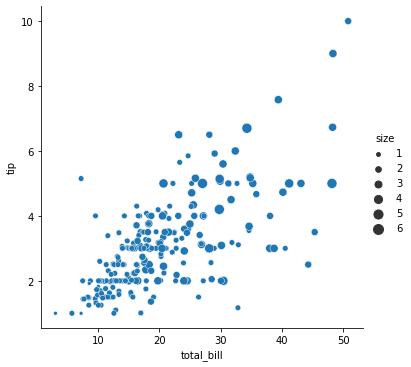

In [22]:
# sizes is an object that determines how sizes are chosen when size is used.
sns.relplot(x='total_bill', y='tip', data=tips, 
            size='size', sizes=(15, 100)) # define the min and max

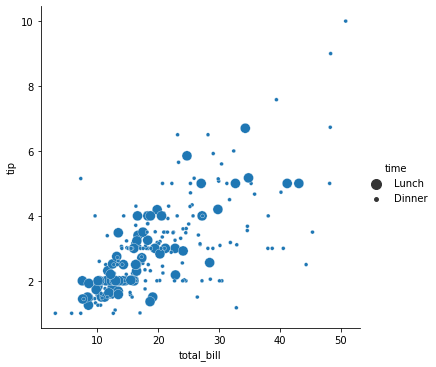

In [23]:
sns.relplot(x='total_bill', y='tip', data=tips, 
            size='time', sizes=(15, 100)) 

In [24]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Line Plot
- [seaborn Line plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)

In [26]:
df = pd.DataFrame(dict(time=np.arange(500), value=randn(500).cumsum()))

In [27]:
df

,time,value
0,0,-0.746804
1,1,-0.555189
2,2,-1.326942
3,3,0.232104
4,4,-0.089863
...,...,...
495,495,-34.778791
496,496,-35.359778
497,497,-34.397024
498,498,-34.112400


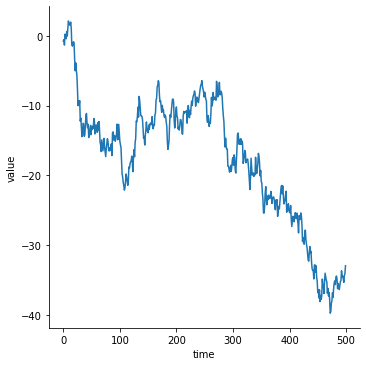

In [28]:
sns.relplot(x='time', y='value', data=df, kind='line')

In [40]:
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


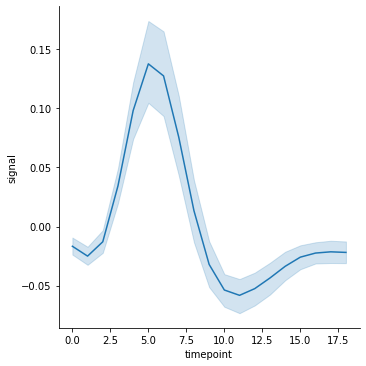

In [31]:
# fig, ax = plt.subplots()

# it appear with ci(confidance interval) =95% it say that the predicted value will lie between the shadow area (it come from the mean in spesific point )
# for example in point 5 because it has many signal it show the mean in point and the shadow show min and max with CI=95
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

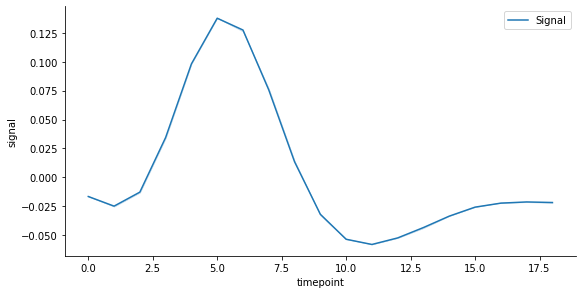

In [62]:
# make it wider and remove ci the point indicate to mean 
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri,
            ci=False, label='Signal', height=4, aspect=2)
plt.legend(loc='best')

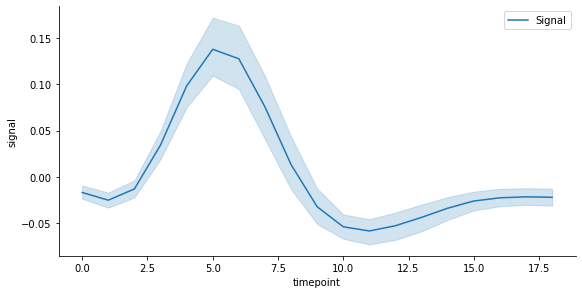

In [75]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri,
            label='Signal', height=4, aspect=2)
plt.legend(loc='best')

In [82]:
fmri[fmri['timepoint']==5]['signal'].mean()

0.13772540199215538

In [68]:
fmri[fmri['timepoint']==5].describe()

,timepoint,signal
count,56.0,56.000000
mean,5.0,0.137725
std,0.0,0.123353
min,5.0,-0.017946
25%,5.0,0.042762
50%,5.0,0.096535
75%,5.0,0.211638
max,5.0,0.476055


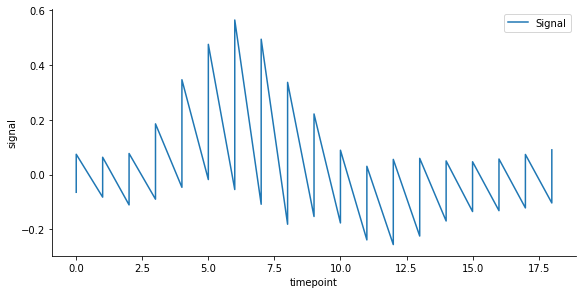

In [83]:
# show the real data
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri,
            label='Signal', height=4, aspect=2,
            estimator=None)
plt.legend(loc='best')

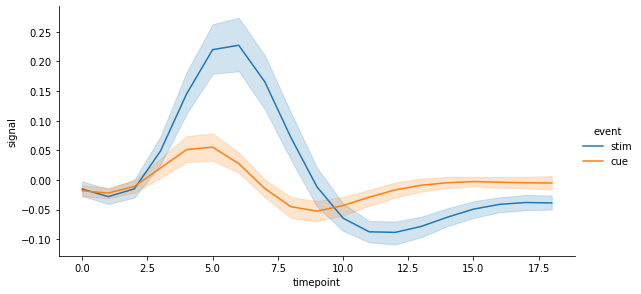

In [85]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri,
            label='Signal', height=4, aspect=2,
            hue='event')

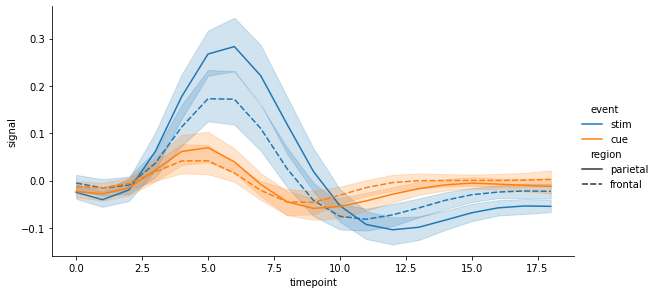

In [86]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri,
            label='Signal', height=4, aspect=2,
            hue='event', style='region')

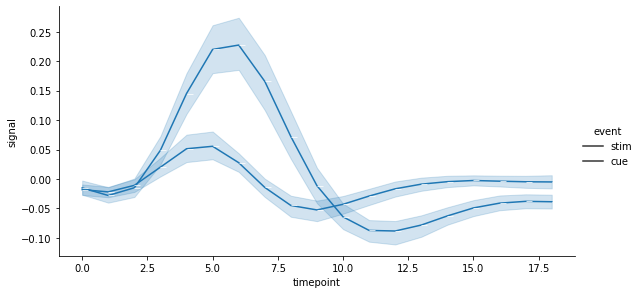

In [89]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri,
            label='Signal', height=4, aspect=2,
            style='event', marker=True, dashes=False)

In [92]:
dots = sns.load_dataset('dots').query("align=='dots'")

In [93]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


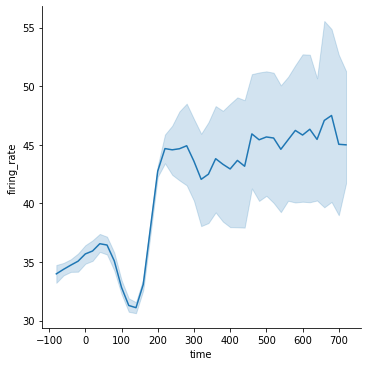

In [94]:
sns.relplot(x='time', y='firing_rate', data=dots, kind='line')

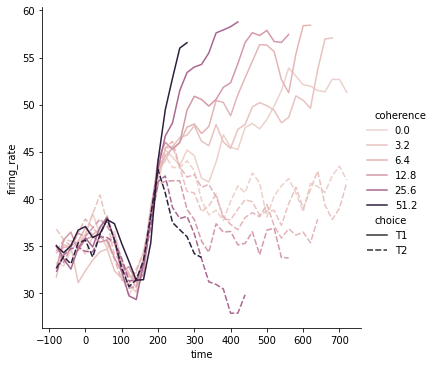

In [96]:
sns.relplot(x='time', y='firing_rate', data=dots, kind='line',
            hue='coherence', style='choice')

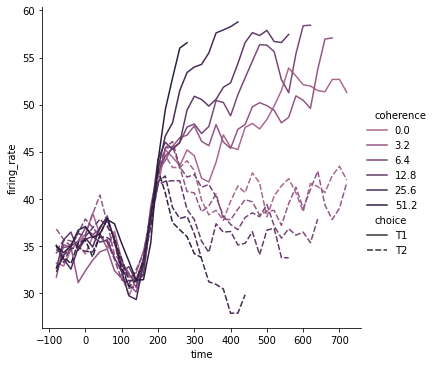

In [100]:
pallette = sns.cubehelix_palette(light=0.5, n_colors=6)
sns.relplot(x='time', y='firing_rate', data=dots, kind='line',
            hue='coherence', style='choice',
            palette=pallette)

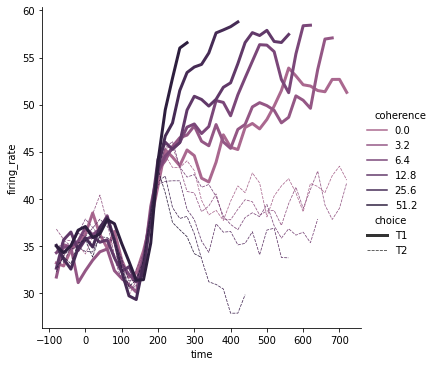

In [104]:
pallette = sns.cubehelix_palette(light=0.5, n_colors=6)
sns.relplot(x='time', y='firing_rate', data=dots, kind='line',
            hue='coherence', style='choice', size='choice',
            palette=pallette)

## Subplot

In [105]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


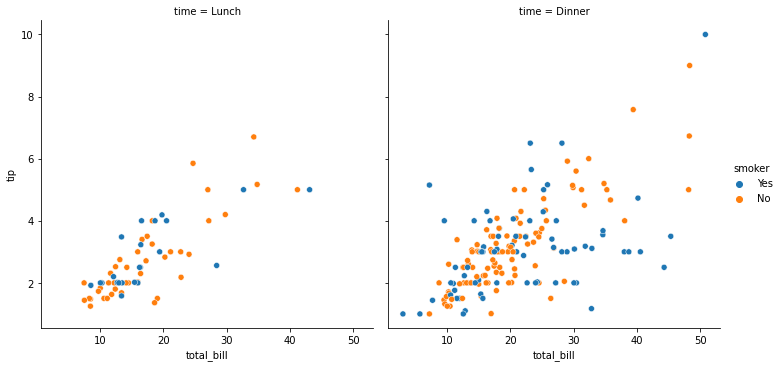

In [110]:
sns.relplot(x='total_bill', y='tip', data=tips, 
            hue='smoker',
            col='time')

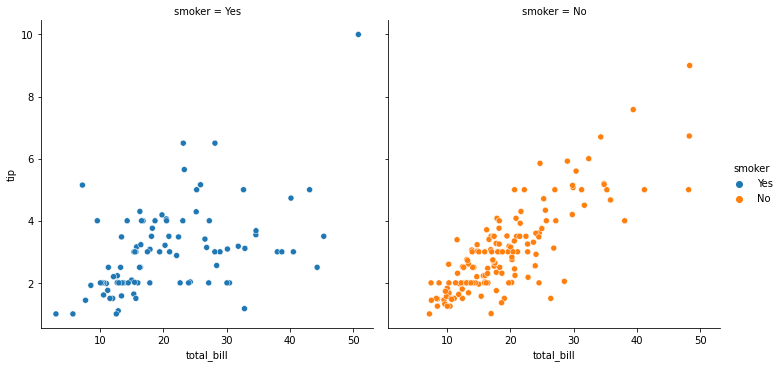

In [112]:
sns.relplot(x='total_bill', y='tip', data=tips, 
            hue='smoker',
            col='smoker')

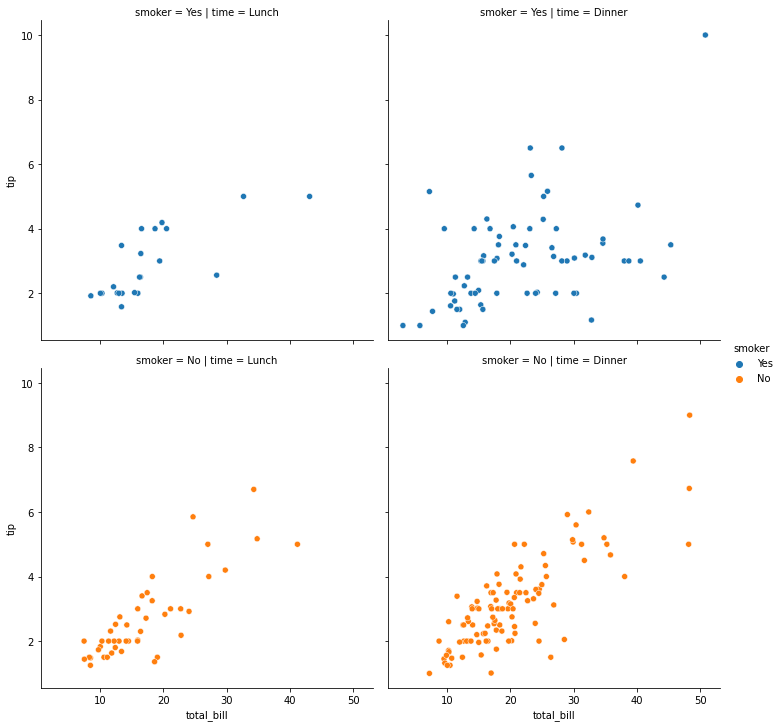

In [146]:
sns.relplot(x='total_bill', y='tip', data=tips, 
            hue='smoker',
            col='time', row='smoker')

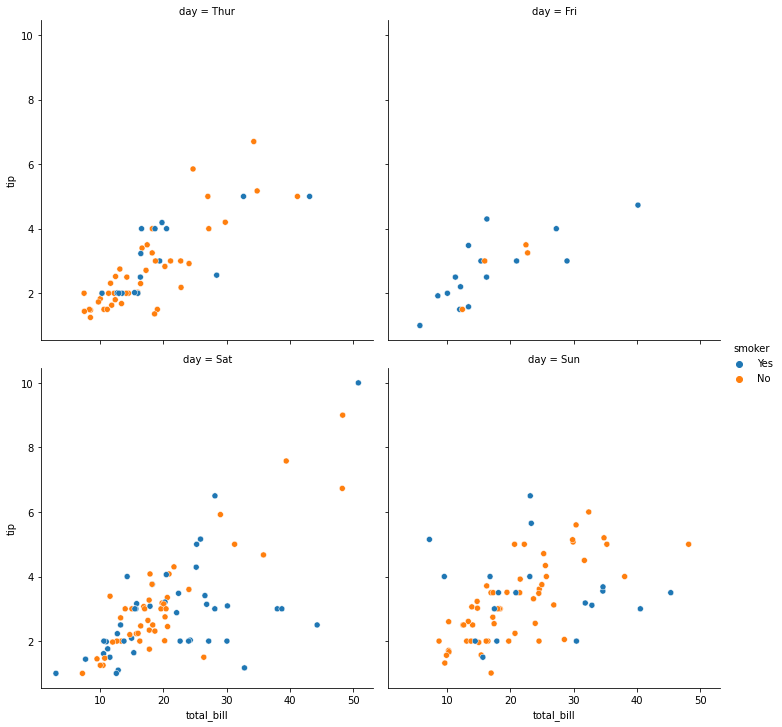

In [148]:
# col_wrap to make the subplots 2 columns
sns.relplot(x='total_bill', y='tip', data=tips, 
            hue='smoker',
            col='day', col_wrap=2)

## sns.lineplot() and sns.scatterplot()

In [149]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


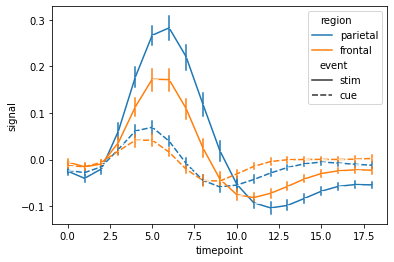

In [152]:
# err_style Whether to draw the confidence intervals with translucent error bands or discrete error bars.

sns.lineplot(x='timepoint', y='signal', 
             style='event', hue='region', data=fmri,
             marker=True, err_style='bars', ci=60)

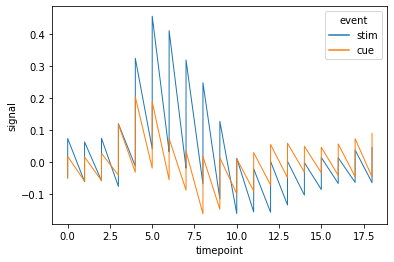

In [157]:
# lw to make lighter

sns.lineplot(x='timepoint', y='signal', 
             hue='event', data=fmri.query("region=='frontal'"),
             estimator=None, lw=1)

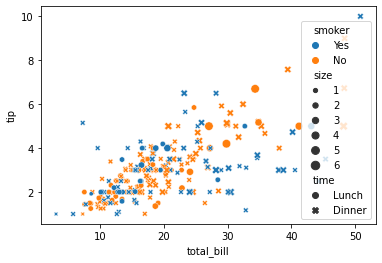

In [163]:
sns.scatterplot(x='total_bill', y='tip', data=tips, 
                hue='smoker', size='size',  style='time',
                )

## Categorical Data Plot

In [165]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


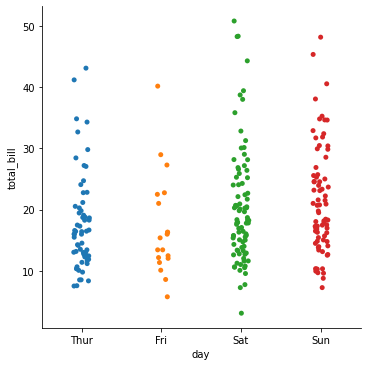

In [166]:
sns.catplot(x='day', y='total_bill', data=tips)

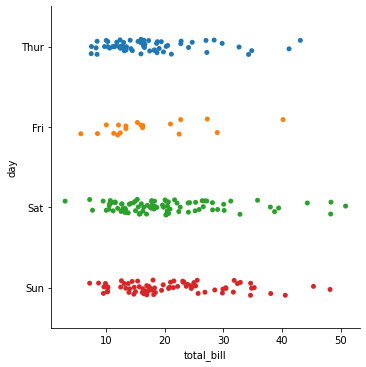

In [168]:
# hirozintal plot
sns.catplot(y='day', x='total_bill', data=tips)

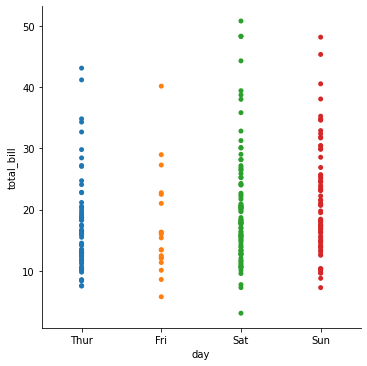

In [170]:
# jitter make it stright
sns.catplot(x='day', y='total_bill', data=tips, 
            jitter=False)

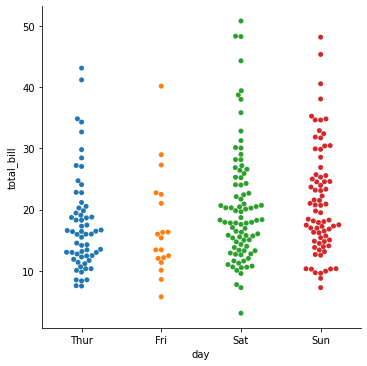

In [171]:
sns.catplot(x='day', y='total_bill', data=tips, kind='swarm')

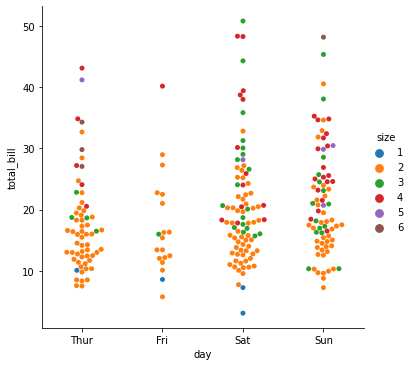

In [172]:
sns.catplot(x='day', y='total_bill', data=tips, kind='swarm', 
            hue='size')

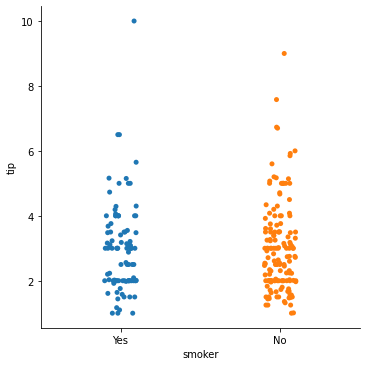

In [175]:
sns.catplot(x='smoker', y='tip', data=tips)

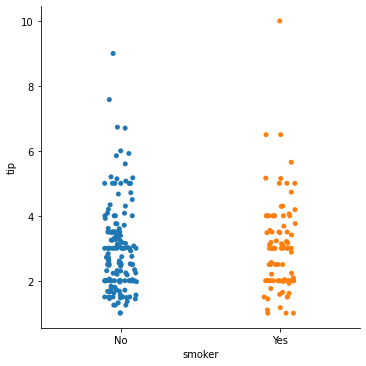

In [176]:
sns.catplot(x='smoker', y='tip', data=tips, order=['No', 'Yes'])

## Box Plot

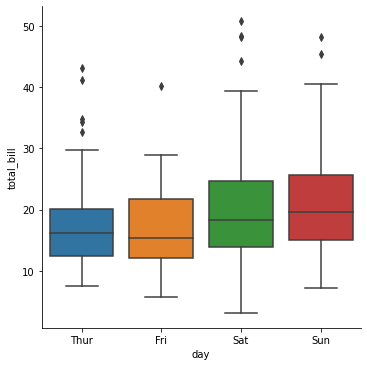

In [177]:
sns.catplot(x='day', y='total_bill', kind='box', data=tips)

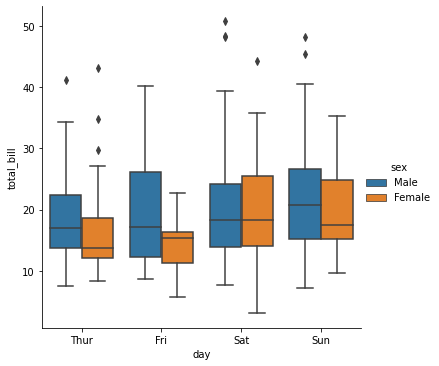

In [178]:
sns.catplot(x='day', y='total_bill', kind='box', data=tips,
            hue='sex')

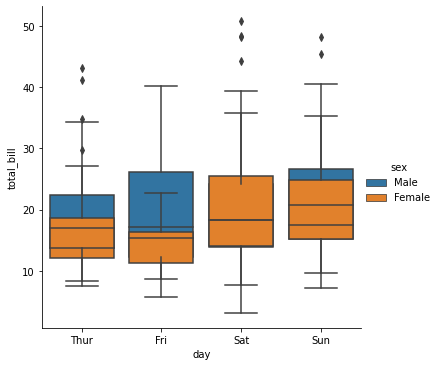

In [181]:
sns.catplot(x='day', y='total_bill', kind='box', data=tips,
            hue='sex', dodge=False)

## Boxen Plot

In [183]:
diamonds = sns.load_dataset('diamonds')

In [184]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


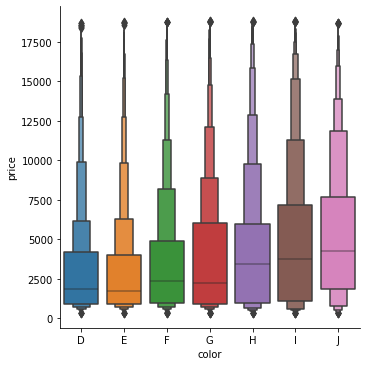

In [188]:
sns.catplot(x='color', y='price', kind='boxen', data=diamonds);

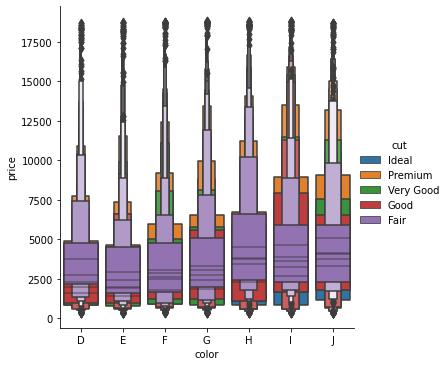

In [190]:
sns.catplot(x='color', y='price', kind='boxen', data=diamonds,
            hue='cut',dodge=False);

## Violin Plot

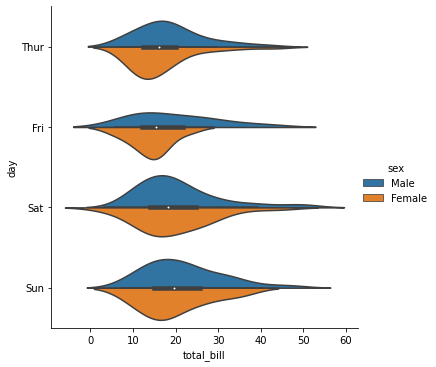

In [194]:
sns.catplot(x='total_bill', y='day', data=tips, kind='violin', 
            hue='sex',  split=True)

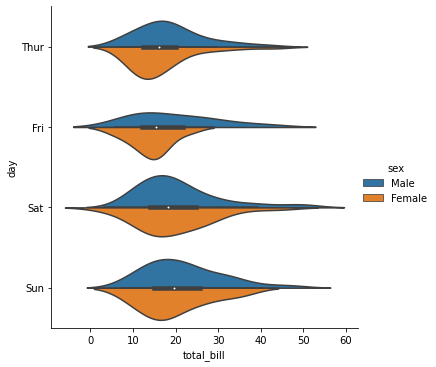

In [203]:
sns.catplot(x='total_bill', y='day', data=tips, kind='violin', 
            hue='sex', split=True)

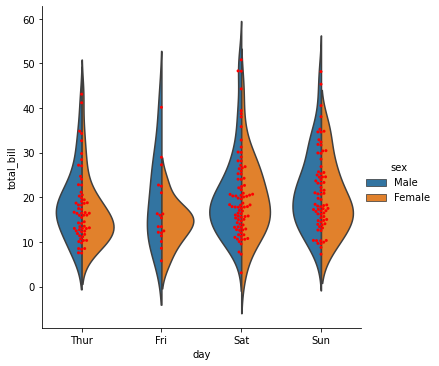

In [223]:
# mix swarm with violin
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips, 
                hue='sex', split=True)
sns.swarmplot(x="day", y="total_bill", color="r", size=3, data=tips, ax=g.ax)

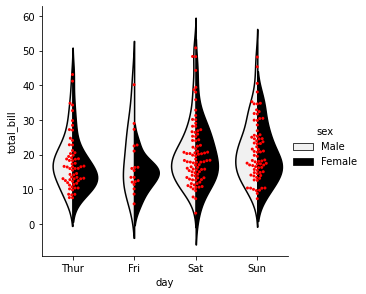

In [229]:
# mix swarm with violin
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips, 
                hue='sex', split=True, height=4, color='k')
sns.swarmplot(x="day", y="total_bill", color="r", size=3, data=tips, ax=g.ax)

## Bar Plot


In [230]:
titanic = sns.load_dataset('titanic')

In [231]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


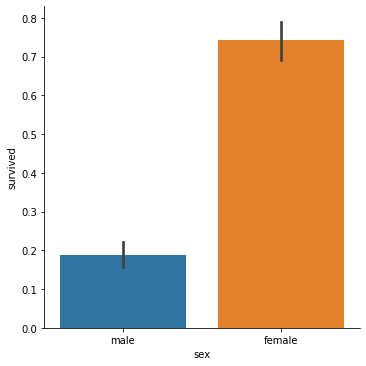

In [251]:
# sns.barplot(x='sex', y='survived', data=titanic)
sns.catplot(x='sex', y='survived', data=titanic, kind='bar')
# Note that estimator is ratio mean

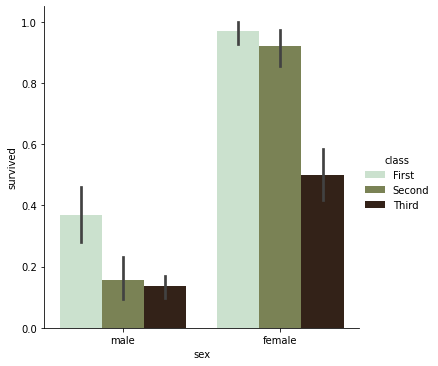

In [240]:
# change the color
sns.catplot(x='sex', y='survived', data=titanic, kind='bar', 
            hue='class', palette='ch:0.95')

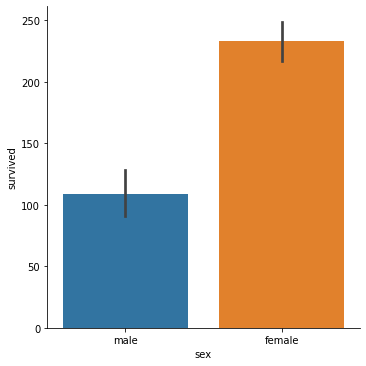

In [250]:
sns.catplot(x='sex', y='survived', kind='bar', data=titanic,
            estimator=sum)


## Point Plot

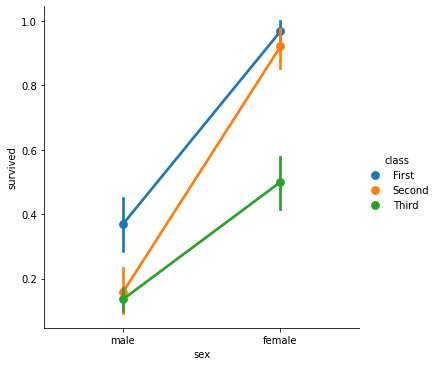

In [255]:
sns.catplot(x='sex', y='survived', kind='point', data=titanic,
            hue='class',)

## Joint Plot

In [256]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [257]:
x = tips['total_bill']
y = tips['tip']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


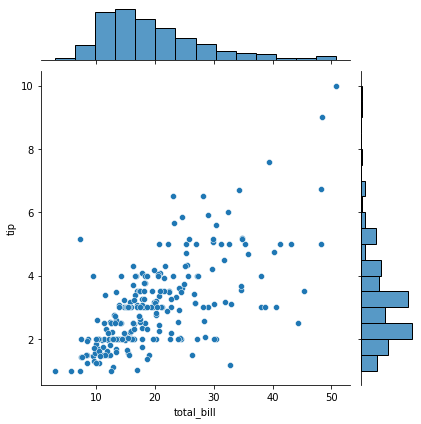

In [259]:
# scatter and his
sns.jointplot(x, y)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


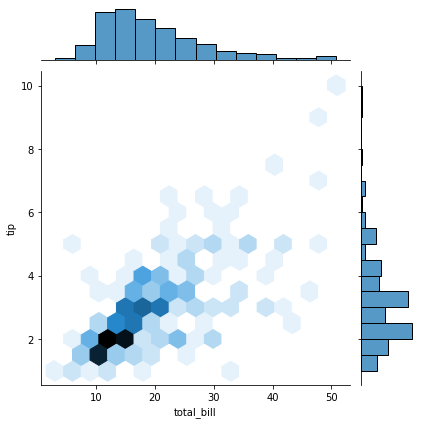

In [260]:
# scatter and his
sns.jointplot(x, y, kind='hex')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


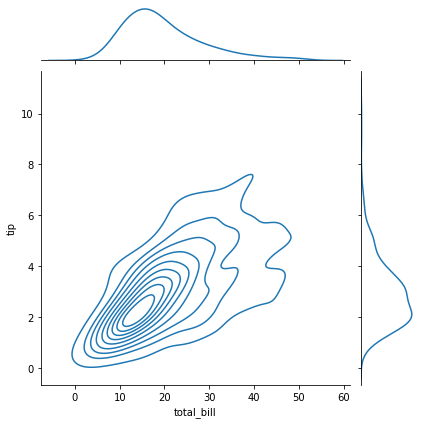

In [261]:
sns.jointplot(x, y, kind='kde')

## Pair Plot
- Plot pairwise relationships in a dataset.

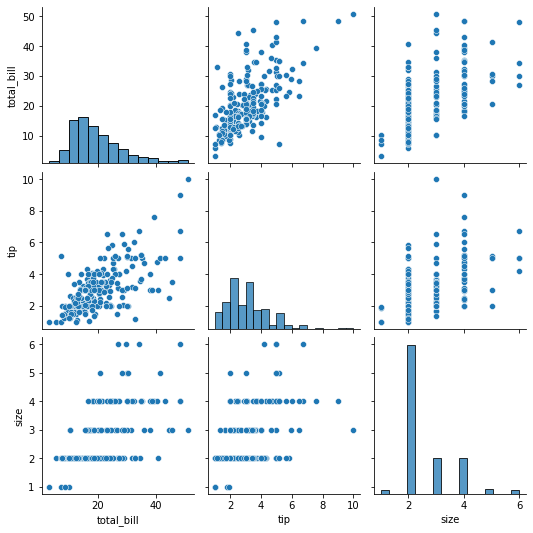

In [262]:
sns.pairplot(tips)

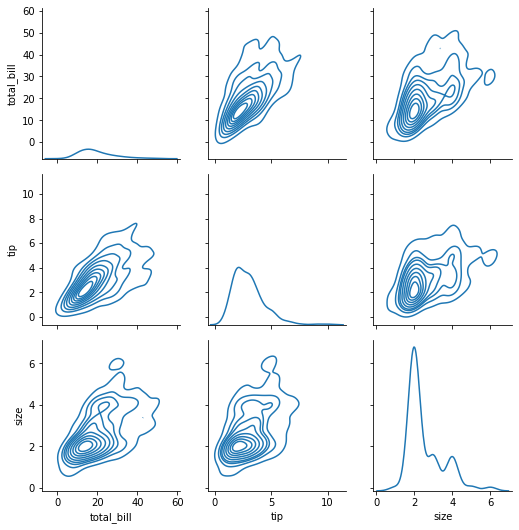

In [265]:
g = sns.PairGrid(tips)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)

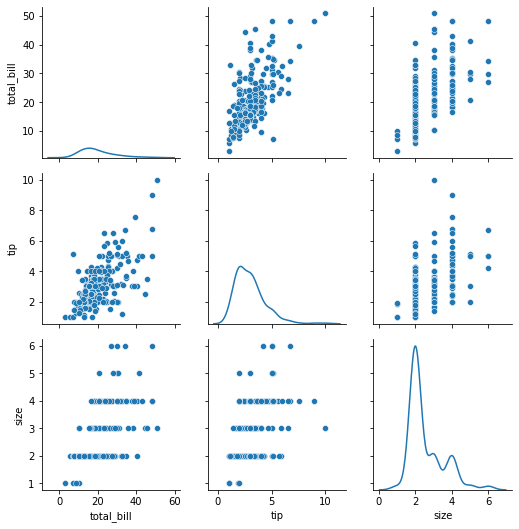

In [267]:
g = sns.PairGrid(tips)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

## Regression Plot

In [269]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


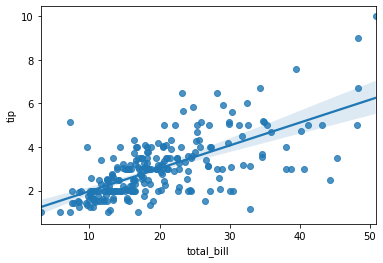

In [270]:
# the heigh lights is about the confidance interval
sns.regplot(x='total_bill', y='tip', data=tips)

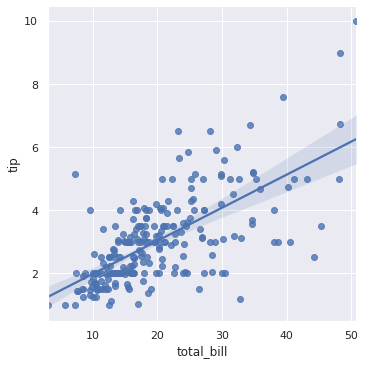

In [273]:
"""
Plot data and regression model fits across a FacetGrid. [...] 
It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.
"""

sns.lmplot(x='total_bill', y='tip', data=tips)

## Figure Aesthetics
- Figure styling
- axes styling
- color pelettes

In [275]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)


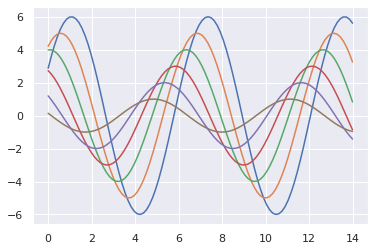

In [276]:
sinplot()

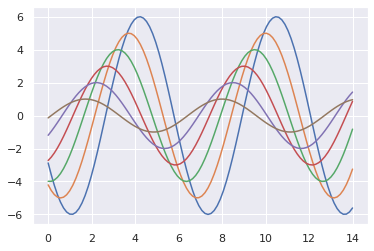

In [277]:
sinplot(-1)

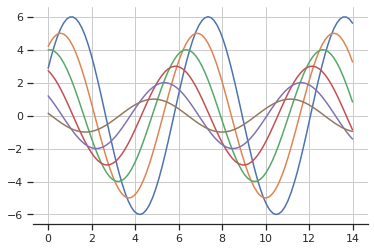

In [278]:
sns.set_style('ticks', {'axes.grid':True, 'xticks.direction':'in'})
sinplot()
sns.despine(left=True, bottom=False)

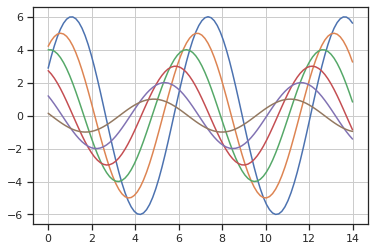

In [279]:
sns.set_style('ticks', {'axes.grid':True, 'xticks.direction':'in'})
sinplot()

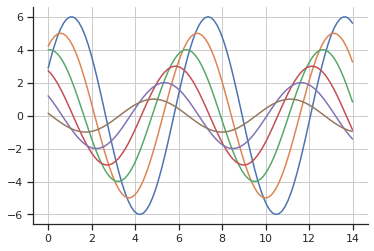

In [280]:
sns.set_style('ticks', {'axes.grid':True, 'xticks.direction':'in'})
sinplot()
sns.despine(left=False, bottom=False)

In [282]:
# to get the property of this plt
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': True,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

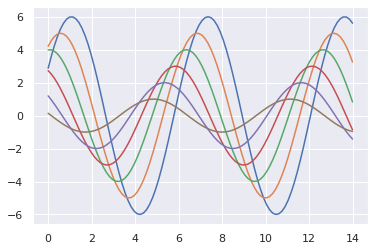

In [284]:
sns.set_style('darkgrid')
sinplot()

In [285]:
sns.axes_style()


{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}